# **Разведочный анализ данных. Исследование и визуализация данных.**

# 1) Текстовое описание набора данных

Датасет состоит из одного файла apple_quality.csv


Файл содержит следующие колонки:
1.   A_id: Уникальный идентификатор для каждого фрукта
2.   Size: Размер плода
3.   Weight: Масса плода
4.   Sweetness: Степень сладости плода
5.   Crunchiness: Текстура, указывающая на хрусткость плода
6.   Juiciness: Уровень сочности плода
7.   Ripeness: Стадия спелости плода
8.   Acidity: Уровень кислотности плода
9.   Quality: Общее качество плода

# Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Загрузка данных

In [4]:
data = pd.read_csv('apple_quality.csv', sep=",")

# 2) Основные характеристики датасета

---



In [5]:
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [6]:
data.shape

(4001, 9)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4001


In [8]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [9]:
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [25]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

A_id - 1
Size - 1
Weight - 1
Sweetness - 1
Crunchiness - 1
Juiciness - 1
Ripeness - 1
Acidity - 0
Quality - 1


In [26]:
data.replace('', pd.NA, inplace=True)
data.dropna(how='any', inplace=True)

In [27]:
# более простой способ
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [28]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [29]:
data['Quality'].unique()

array(['good', 'bad'], dtype=object)

# 3) Визуальное исследование датасета

<Axes: xlabel='Size', ylabel='Weight'>

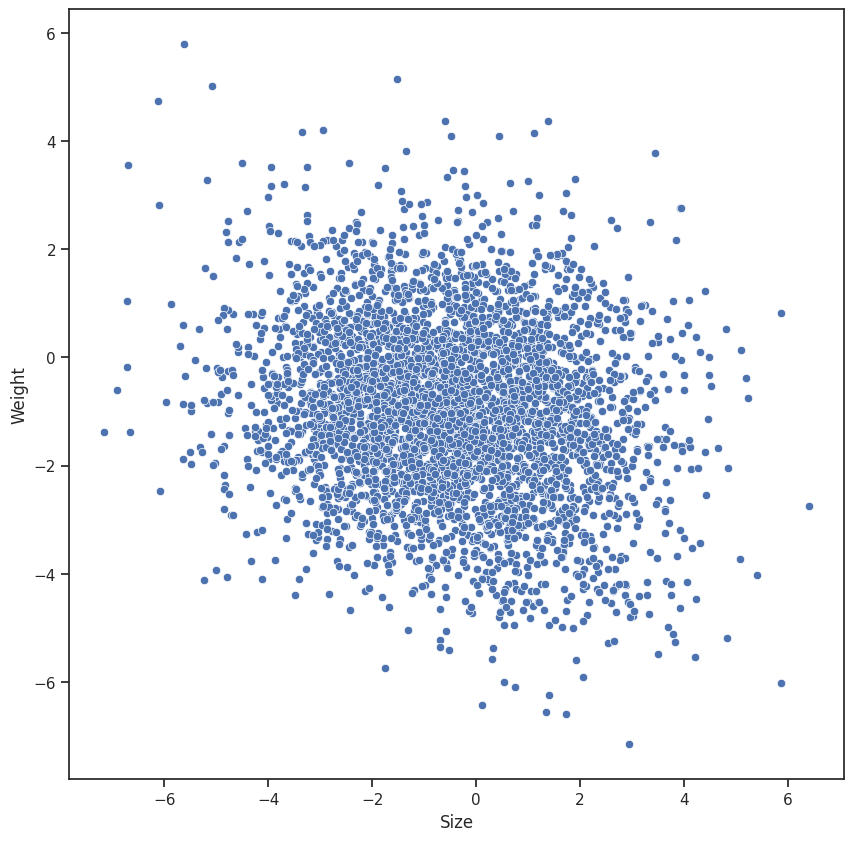

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data)

<Axes: xlabel='Size', ylabel='Weight'>

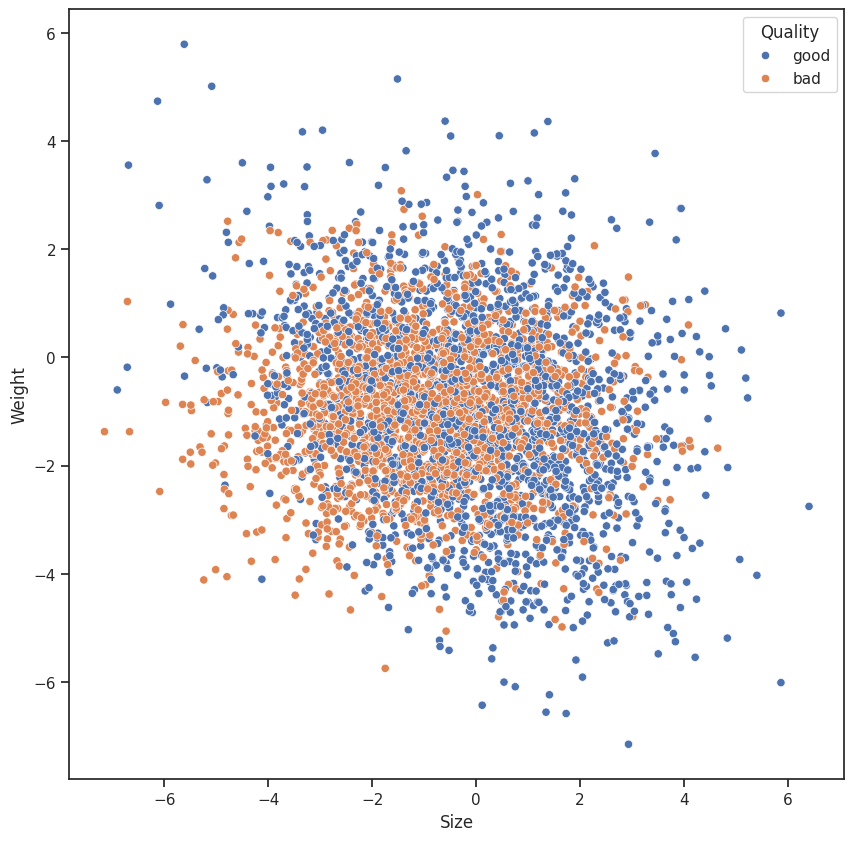

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data, hue='Quality')

# Гистограмма

<ipython-input-32-775fd31d07d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

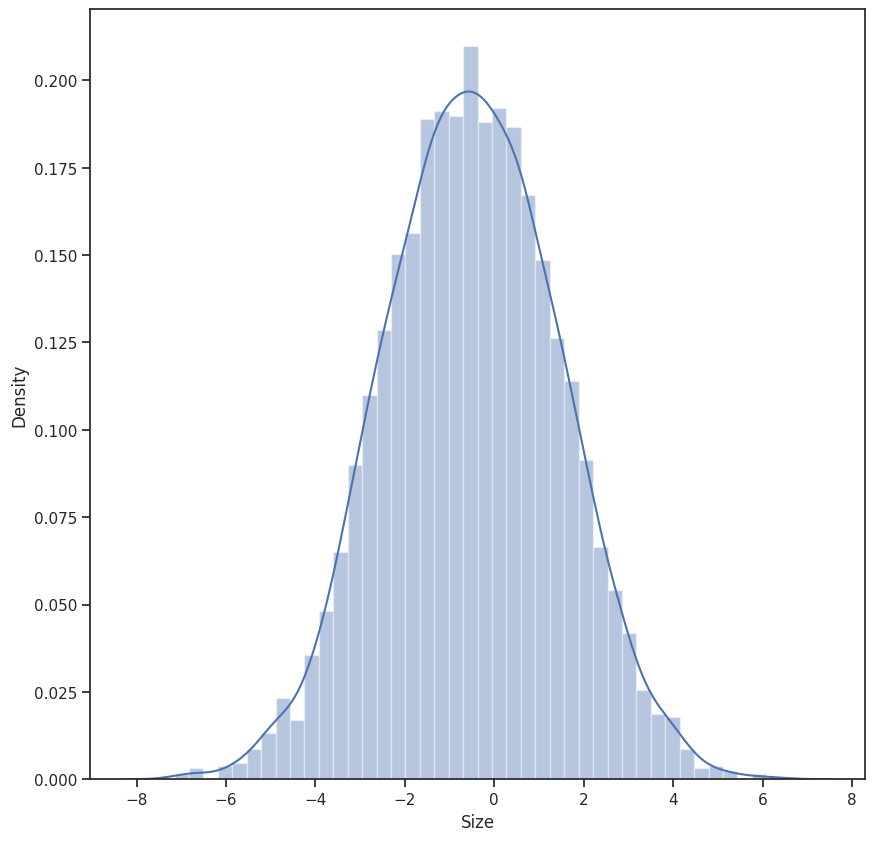

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['Size'])

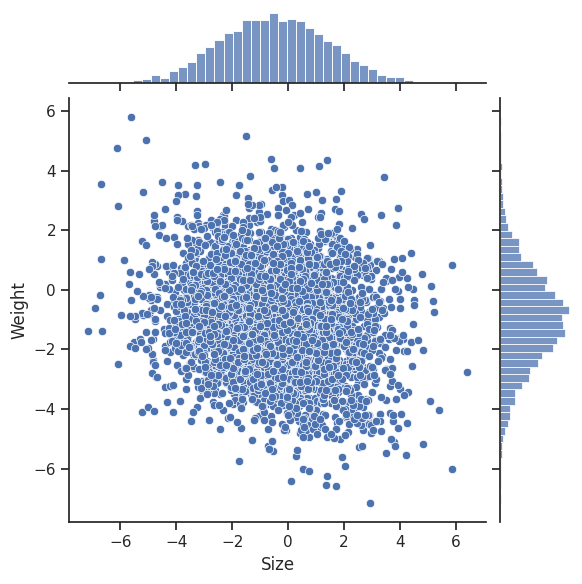

In [33]:
sns.jointplot(x='Size', y='Weight', data=data)

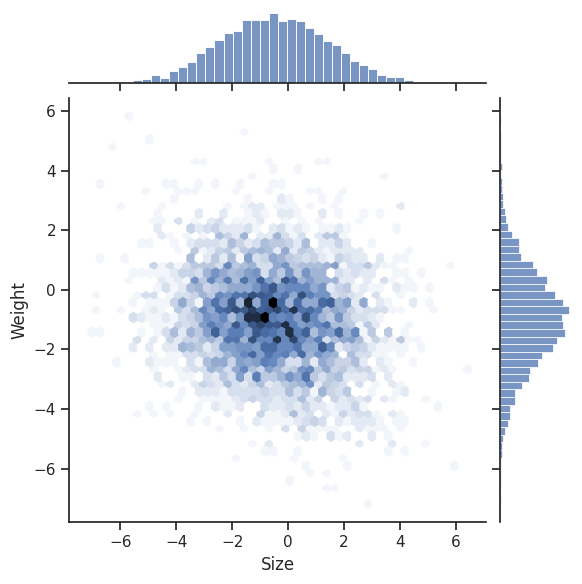

In [34]:
sns.jointplot(x='Size', y='Weight', data=data, kind="hex")

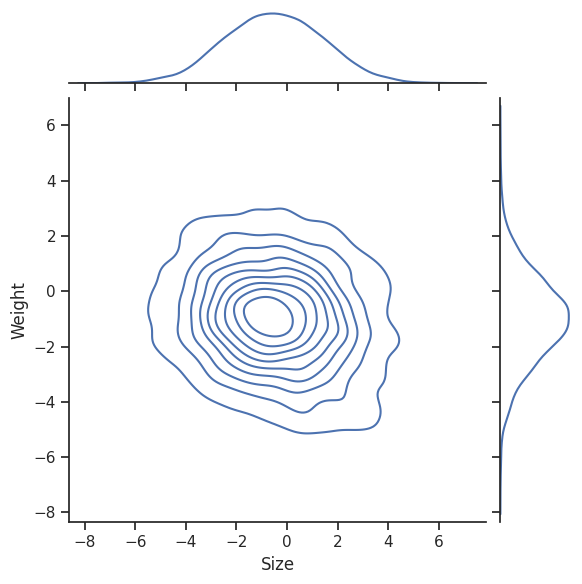

In [35]:
sns.jointplot(x='Size', y='Weight', data=data, kind="kde")

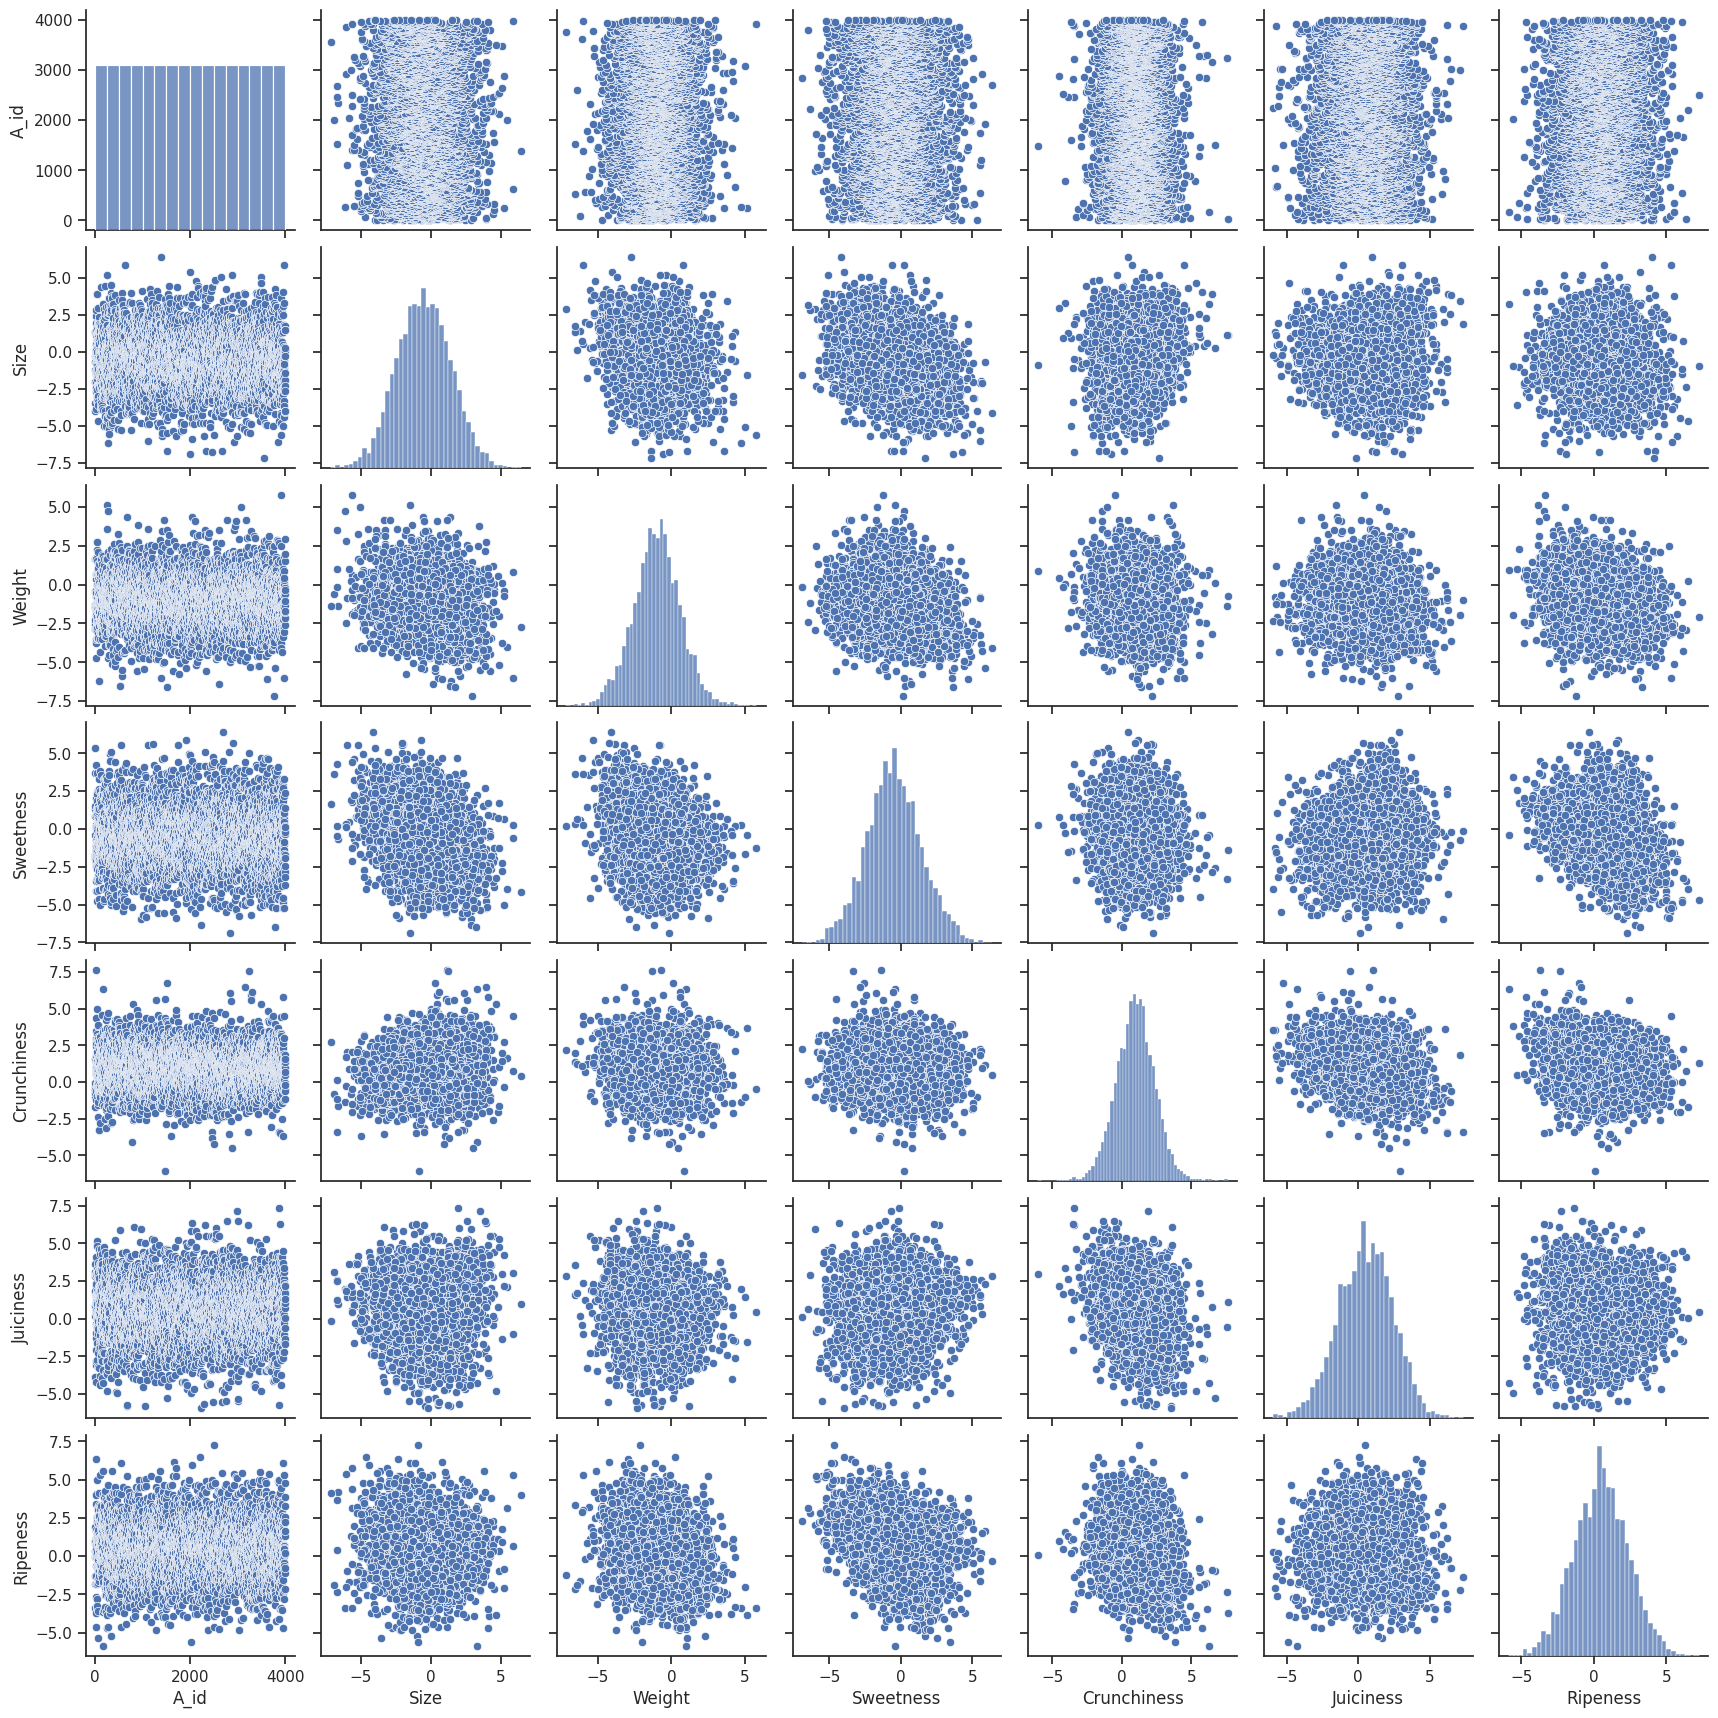

In [36]:
sns.pairplot(data)

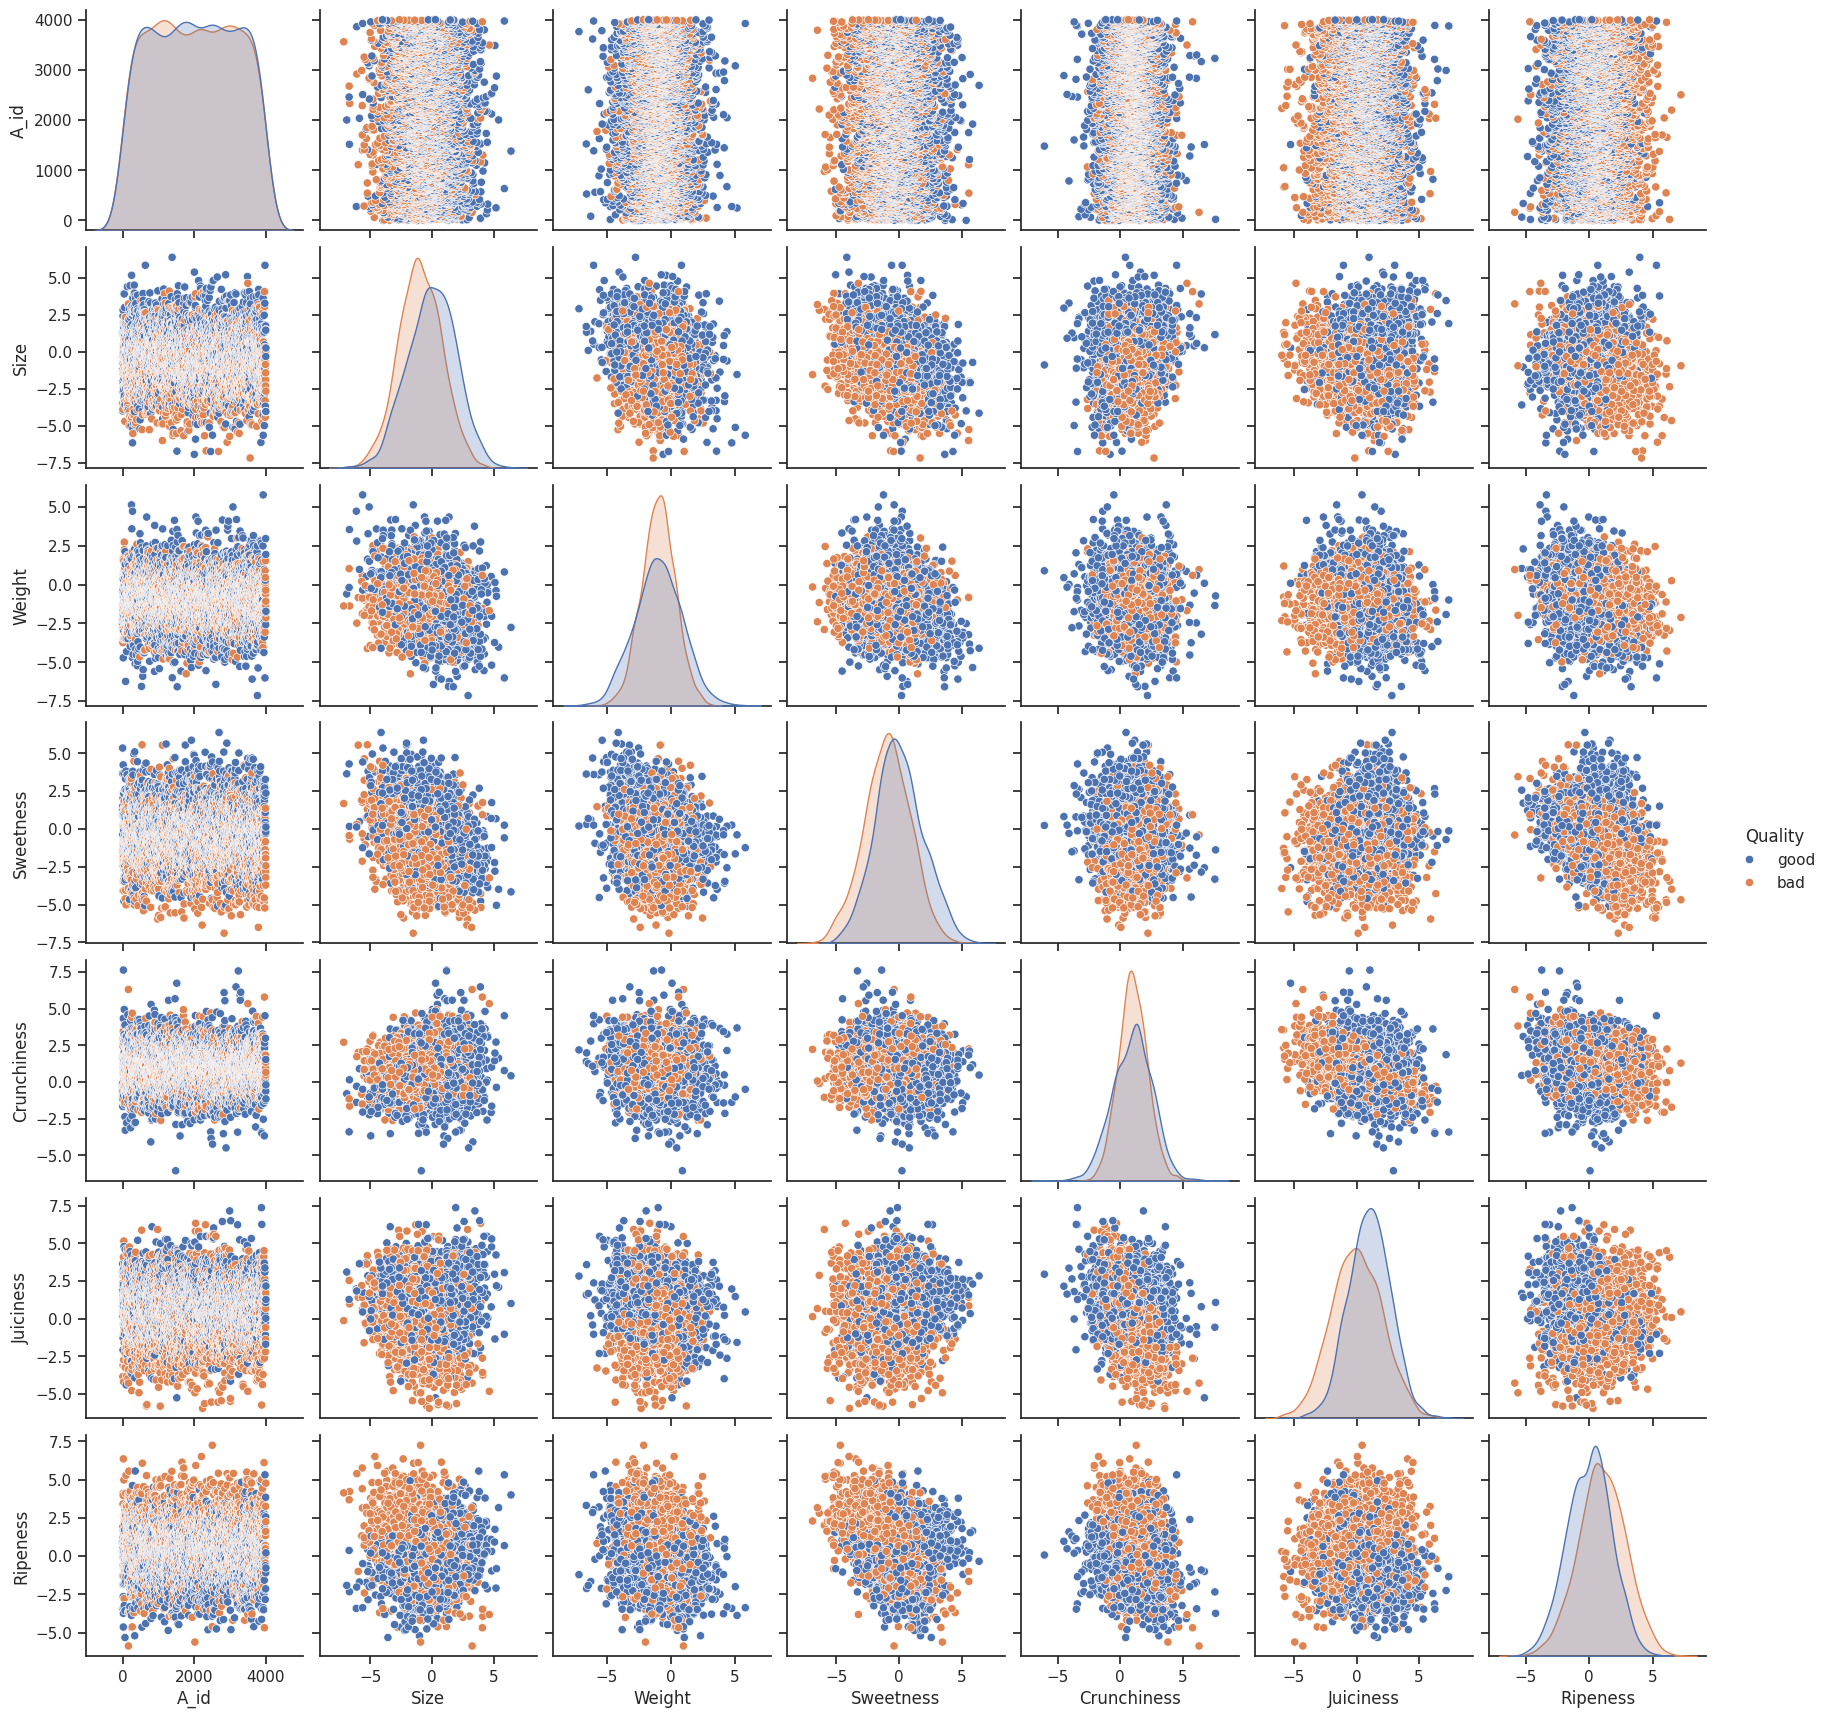

In [37]:
sns.pairplot(data, hue="Quality")

# Ящик с усами

<Axes: xlabel='Size'>

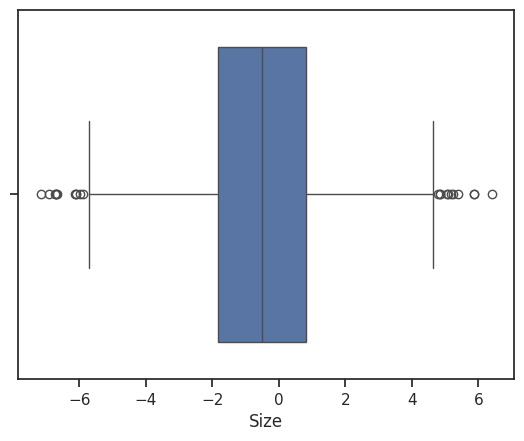

In [38]:
sns.boxplot(x=data['Size'])

<Axes: ylabel='Size'>

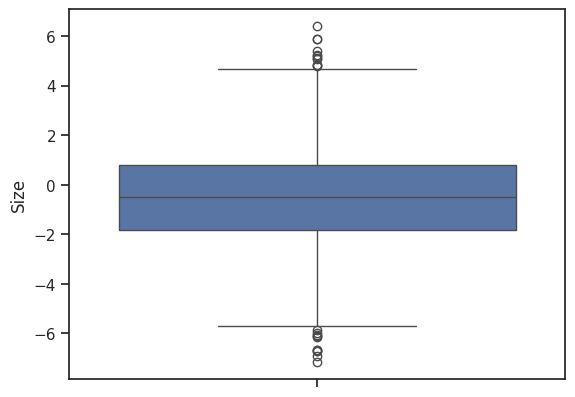

In [39]:
sns.boxplot(y=data['Size'])

<Axes: xlabel='Quality', ylabel='Size'>

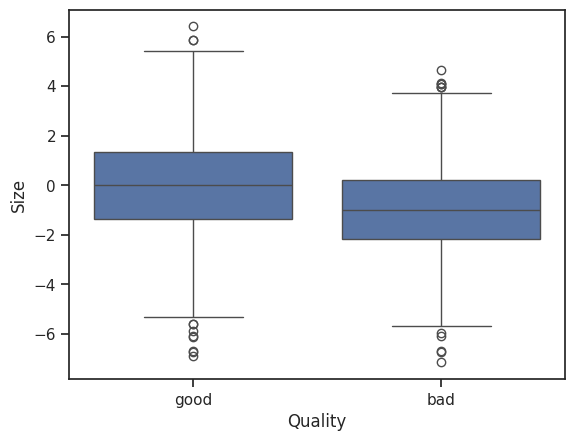

In [40]:
sns.boxplot(x='Quality', y='Size', data=data)

# Violin plot

<Axes: xlabel='Size'>

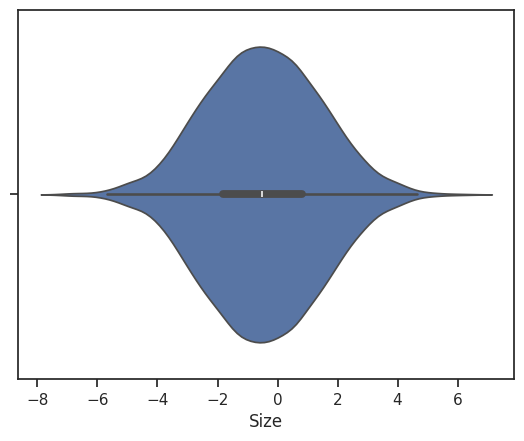

In [41]:
sns.violinplot(x=data['Size'])

<ipython-input-42-e94b65f39b03>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'], ax=ax[1])


<Axes: xlabel='Size', ylabel='Density'>

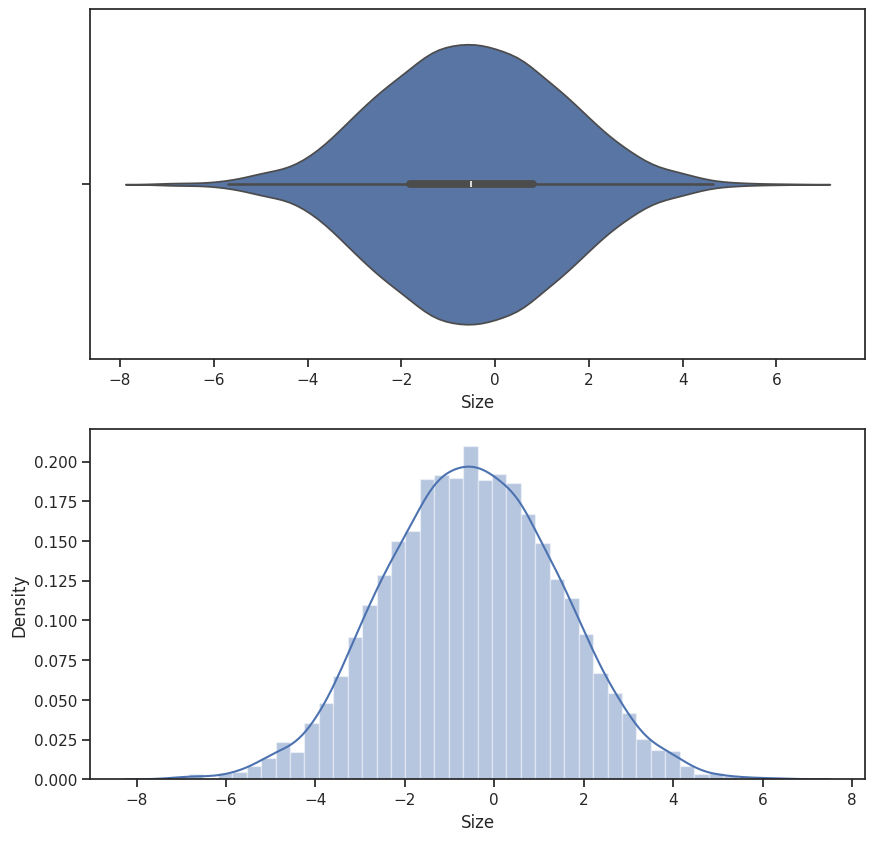

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Size'])
sns.distplot(data['Size'], ax=ax[1])

<Axes: xlabel='Quality', ylabel='Size'>

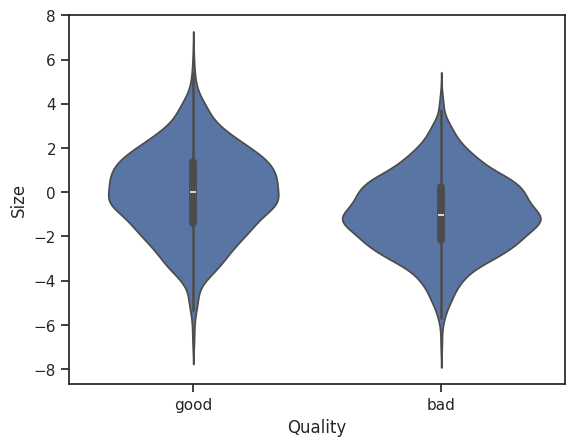

In [43]:
sns.violinplot(x='Quality', y='Size', data=data)

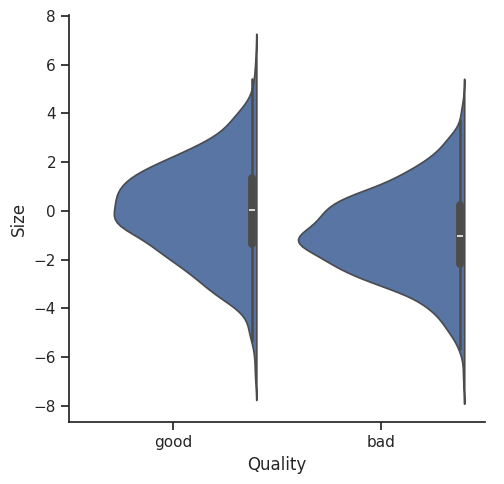

In [44]:
sns.catplot(y='Size', x='Quality', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

In [45]:
data.corr()

<ipython-input-45-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   

             Ripeness  
A_id         0.000742  
Size        -0.134773  
Weight      -0.243824  
Sweetness   -0.273800  
Crunchiness -0.201982  
Juiciness   -0.097144  
Ripeness     1.000000

In [46]:
data.corr(method='kendall')

<ipython-input-46-eef8b96b14ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='kendall')


A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.022124 -0.004756   0.001090    -0.010822   0.002903   
Size        -0.022124  1.000000 -0.097221  -0.211004     0.118658  -0.023001   
Weight      -0.004756 -0.097221  1.000000  -0.080836    -0.058782  -0.060676   
Sweetness    0.001090 -0.211004 -0.080836   1.000000    -0.011565   0.065046   
Crunchiness -0.010822  0.118658 -0.058782  -0.011565     1.000000  -0.161359   
Juiciness    0.002903 -0.023001 -0.060676   0.065046    -0.161359   1.000000   
Ripeness    -0.003643 -0.101724 -0.166940  -0.171992    -0.125027  -0.085860   

             Ripeness  
A_id        -0.003643  
Size        -0.101724  
Weight      -0.166940  
Sweetness   -0.171992  
Crunchiness -0.125027  
Juiciness   -0.085860  
Ripeness     1.000000

<ipython-input-47-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

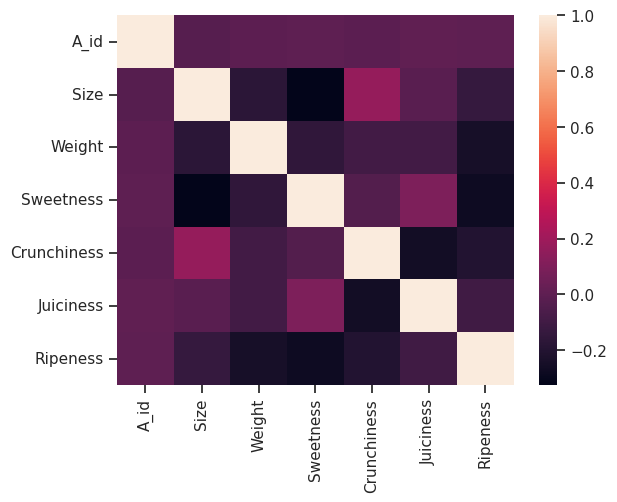

In [47]:
sns.heatmap(data.corr())

<ipython-input-48-16d16d921b25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f')


<Axes: >

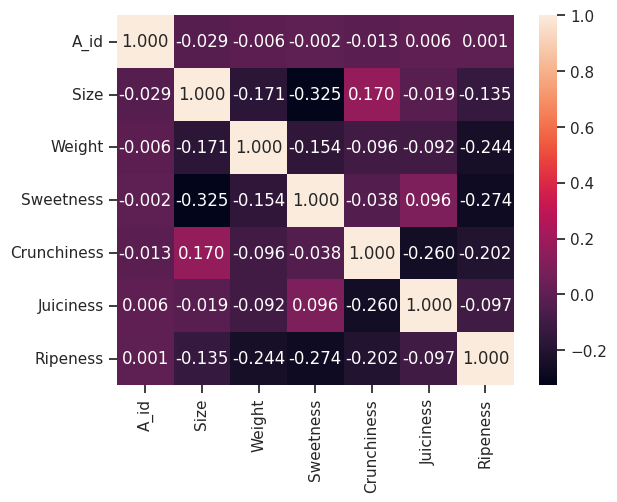

In [48]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')